In [1]:
import pandas as pd

# Sample Data Creation
data = {
    "Order_ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Date": ["2024-01-01", "2024-01-02", "2024-01-03", "2024-01-04", "2024-01-05",
             "2024-01-06", "2024-01-07", "2024-01-08", "2024-01-09", "2024-01-10"],
    "Product": ["Laptop", "Office Chair", "Smartphone", "Desk", "Monitor",
                "Notebook", "Pen Set", "Sofa", "Headphones", "Printer"],
    "Category": ["Electronics", "Furniture", "Electronics", "Furniture", "Electronics",
                 "Office Supplies", "Office Supplies", "Furniture", "Electronics", "Electronics"],
    "Sub-Category": ["Computers", "Chairs", "Mobile Phones", "Tables", "Computers",
                     "Paper", "Writing", "Sofas", "Accessories", "Office Tools"],
    "Region": ["East", "West", "South", "East", "North",
               "West", "South", "East", "West", "South"],
    "Customer_ID": ["C001", "C002", "C003", "C004", "C005",
                    "C006", "C007", "C008", "C009", "C010"],
    "Sales ($)": [1200, 250, 800, 600, 300, 20, 15, 700, 100, 150],
    "Quantity": [1, 2, 1, 1, 1, 10, 5, 1, 2, 1],
    "Profit ($)": [300, 50, 200, 150, 80, 5, 3, 120, 20, 30],
}

# Convert to DataFrame
sales_data = pd.DataFrame(data)

# Display the dataset
print(sales_data)


   Order_ID        Date       Product         Category   Sub-Category Region  \
0         1  2024-01-01        Laptop      Electronics      Computers   East   
1         2  2024-01-02  Office Chair        Furniture         Chairs   West   
2         3  2024-01-03    Smartphone      Electronics  Mobile Phones  South   
3         4  2024-01-04          Desk        Furniture         Tables   East   
4         5  2024-01-05       Monitor      Electronics      Computers  North   
5         6  2024-01-06      Notebook  Office Supplies          Paper   West   
6         7  2024-01-07       Pen Set  Office Supplies        Writing  South   
7         8  2024-01-08          Sofa        Furniture          Sofas   East   
8         9  2024-01-09    Headphones      Electronics    Accessories   West   
9        10  2024-01-10       Printer      Electronics   Office Tools  South   

  Customer_ID  Sales ($)  Quantity  Profit ($)  
0        C001       1200         1         300  
1        C002        

In [2]:
# Step 2: Data Cleaning and Preprocessing

# 1. Check for missing values
print("Missing Values:\n", sales_data.isnull().sum())

# 2. Check for duplicate rows
duplicates = sales_data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicates if any
sales_data = sales_data.drop_duplicates()

# 3. Convert Date column to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# 4. Extract useful time features (Year, Month, Day)
sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Day'] = sales_data['Date'].dt.day

# 5. Check data types to ensure correctness
print("\nData Types:\n", sales_data.dtypes)

# Display the cleaned dataset
print("\nCleaned Dataset:\n", sales_data.head())


Missing Values:
 Order_ID        0
Date            0
Product         0
Category        0
Sub-Category    0
Region          0
Customer_ID     0
Sales ($)       0
Quantity        0
Profit ($)      0
dtype: int64
Number of duplicate rows: 0

Data Types:
 Order_ID                 int64
Date            datetime64[ns]
Product                 object
Category                object
Sub-Category            object
Region                  object
Customer_ID             object
Sales ($)                int64
Quantity                 int64
Profit ($)               int64
Year                     int64
Month                    int64
Day                      int64
dtype: object

Cleaned Dataset:
    Order_ID       Date       Product     Category   Sub-Category Region  \
0         1 2024-01-01        Laptop  Electronics      Computers   East   
1         2 2024-01-02  Office Chair    Furniture         Chairs   West   
2         3 2024-01-03    Smartphone  Electronics  Mobile Phones  South   
3         4 

Sales Summary Statistics:
 count      10.000000
mean      413.500000
std       395.221808
min        15.000000
25%       112.500000
50%       275.000000
75%       675.000000
max      1200.000000
Name: Sales ($), dtype: float64

Total Sales and Profit by Region:
         Sales ($)  Profit ($)
Region                       
East         2500         570
South         965         233
West          370          75
North         300          80


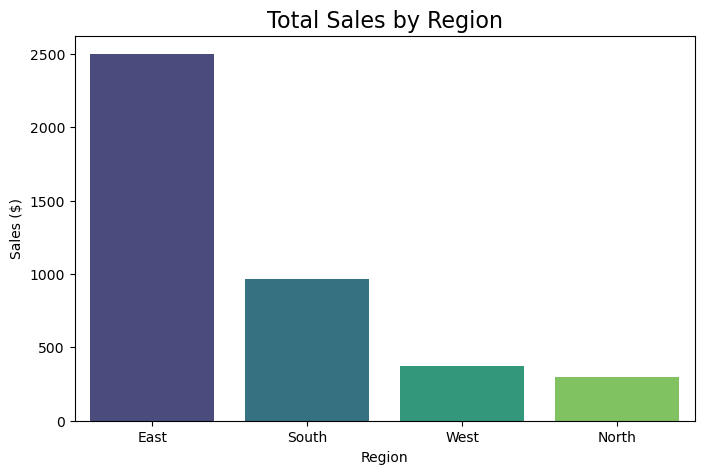


Top 5 Products by Sales:
 Product
Laptop        1200
Smartphone     800
Sofa           700
Desk           600
Monitor        300
Name: Sales ($), dtype: int64


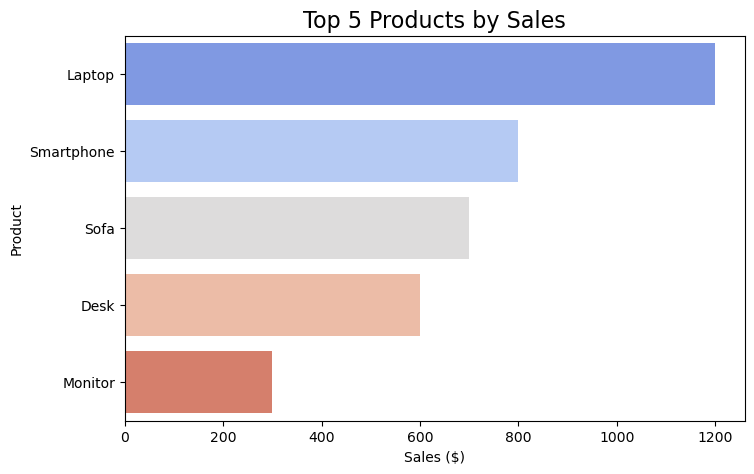

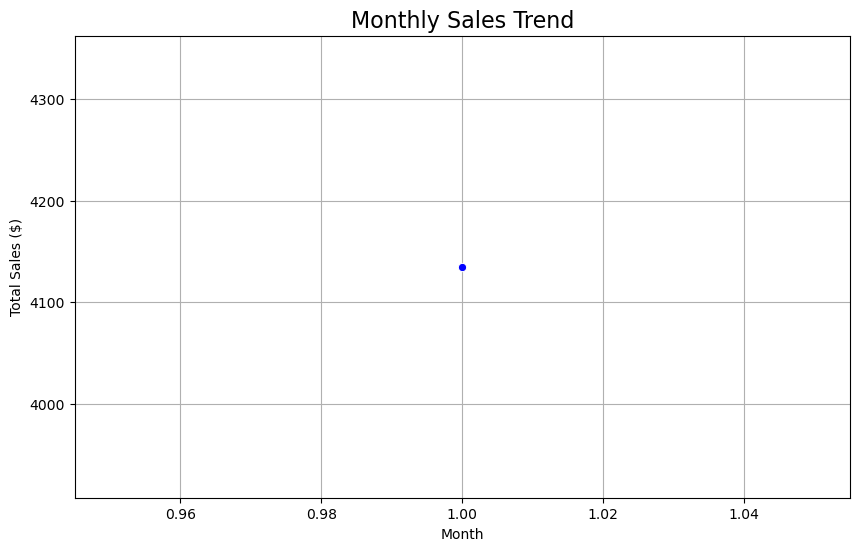

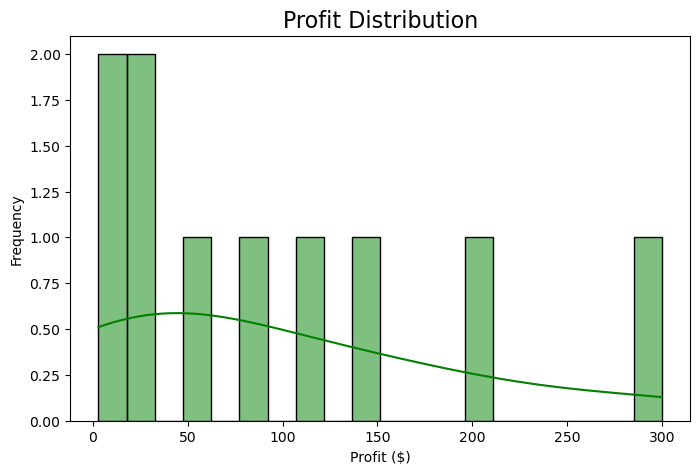

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Exploratory Data Analysis (EDA)

# 1. Overview of sales statistics
print("Sales Summary Statistics:\n", sales_data['Sales ($)'].describe())

# 2. Total sales and profit by region
region_sales = sales_data.groupby('Region')[['Sales ($)', 'Profit ($)']].sum().sort_values('Sales ($)', ascending=False)
print("\nTotal Sales and Profit by Region:\n", region_sales)

# Bar chart for sales by region
plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.index, y=region_sales['Sales ($)'], palette="viridis")
plt.title("Total Sales by Region", fontsize=16)
plt.ylabel("Sales ($)")
plt.xlabel("Region")
plt.show()

# 3. Top 5 products by sales
top_products = sales_data.groupby('Product')['Sales ($)'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Sales:\n", top_products)

# Bar chart for top 5 products
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.title("Top 5 Products by Sales", fontsize=16)
plt.xlabel("Sales ($)")
plt.ylabel("Product")
plt.show()

# 4. Sales trend over time
plt.figure(figsize=(10, 6))
sales_trend = sales_data.groupby('Month')['Sales ($)'].sum()
sns.lineplot(x=sales_trend.index, y=sales_trend.values, marker='o', color='blue')
plt.title("Monthly Sales Trend", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.show()

# 5. Profit distribution
plt.figure(figsize=(8, 5))
sns.histplot(sales_data['Profit ($)'], kde=True, color="green", bins=20)
plt.title("Profit Distribution", fontsize=16)
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.show()



Most Profitable Sub-Categories:
 Sub-Category
Computers        380
Mobile Phones    200
Tables           150
Sofas            120
Chairs            50
Name: Profit ($), dtype: int64


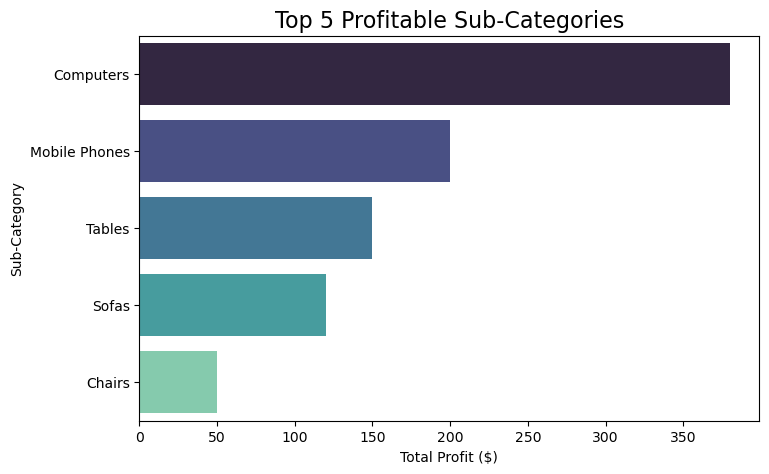


Sales Contribution by Category (%):
 Category
Electronics        61.668682
Furniture          37.484885
Office Supplies     0.846433
Name: Sales ($), dtype: float64


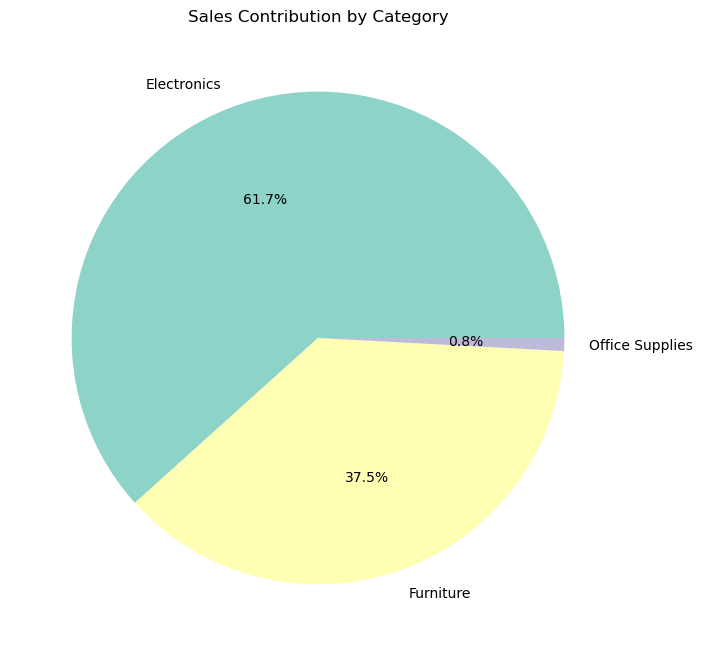


Top 5 Customers by Average Sales:
 Customer_ID
C001    1200.0
C003     800.0
C008     700.0
C004     600.0
C005     300.0
Name: Sales ($), dtype: float64

Average Profit Margin by Region (%):
 Region
East     22.380952
North    26.666667
South    21.666667
West     21.666667
Name: Profit Margin (%), dtype: float64


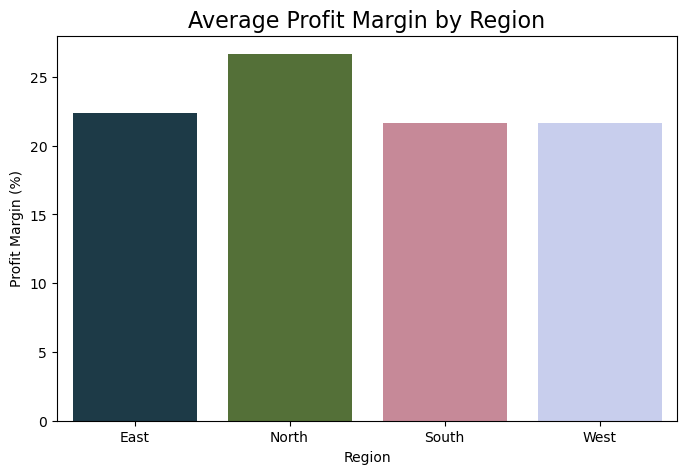

In [4]:
# Step 4: Advanced Insights

# 1. Identify the most profitable sub-category
sub_category_profit = sales_data.groupby('Sub-Category')['Profit ($)'].sum().sort_values(ascending=False)
print("\nMost Profitable Sub-Categories:\n", sub_category_profit.head())

# Visualization: Top 5 profitable sub-categories
plt.figure(figsize=(8, 5))
sns.barplot(x=sub_category_profit.head(5).values, y=sub_category_profit.head(5).index, palette="mako")
plt.title("Top 5 Profitable Sub-Categories", fontsize=16)
plt.xlabel("Total Profit ($)")
plt.ylabel("Sub-Category")
plt.show()

# 2. Sales contribution by category
category_sales = sales_data.groupby('Category')['Sales ($)'].sum()
category_sales_percentage = (category_sales / category_sales.sum()) * 100
print("\nSales Contribution by Category (%):\n", category_sales_percentage)

# Pie chart: Sales contribution by category
plt.figure(figsize=(8, 8))
category_sales_percentage.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title("Sales Contribution by Category")
plt.ylabel("")
plt.show()

# 3. Customer purchasing patterns: Average sales per customer
customer_sales = sales_data.groupby('Customer_ID')['Sales ($)'].mean().sort_values(ascending=False)
print("\nTop 5 Customers by Average Sales:\n", customer_sales.head())

# 4. Region-wise profit margins
sales_data['Profit Margin (%)'] = (sales_data['Profit ($)'] / sales_data['Sales ($)']) * 100
region_profit_margin = sales_data.groupby('Region')['Profit Margin (%)'].mean()
print("\nAverage Profit Margin by Region (%):\n", region_profit_margin)

# Visualization: Region-wise profit margins
plt.figure(figsize=(8, 5))
sns.barplot(x=region_profit_margin.index, y=region_profit_margin.values, palette="cubehelix")
plt.title("Average Profit Margin by Region", fontsize=16)
plt.xlabel("Region")
plt.ylabel("Profit Margin (%)")
plt.show()
